<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 2 - NN & Backpropagation



_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.18.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [37]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [38]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [39]:
#Definindo, compilando e treinando nosso modelo
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1),
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(xs,ys,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3085.8318  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3153.8201 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3169.7983 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3158.8901 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3224.0833 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3162.5862 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3179.2798 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2963.3914 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3293.2085 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2986.4944
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3164.0757 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3207.0618 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3166.9629 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3278.5627 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [40]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

In [41]:
print("prediction: "+ str(model.predict(np.array([17])))+"      real value: " + str(f1(17)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
prediction: [[37.022327]]      real value: 175


In [42]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1838.0894


2410.248291015625

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE).

## Aprendendo uma função não linear

In [18]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [19]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação (por que?).

In [33]:
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)

])

model.compile(optimizer="rmsprop", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 10.4495  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4678  
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6042
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2745
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8074 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2928 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6741 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8739
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3893 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7186 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2315 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1051 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5912 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3444 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1404 
Epoch 16/400
4/4

In [34]:
model.summary()
print("prediction: "+ str(model.predict(np.array([17])))+"      real value: " + str(f2(17)))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51 (208.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
prediction: [[1.3013729]]      real value: 1.72


In [35]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

In [36]:
model.evaluate(x=x_val,y=y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.0418e-04 


0.0005381871596910059

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica



Ao testar diferentes funções de ativação, observei que:

Sigmoid e tanh performaram melhor que ReLU, pois a saída da função f2(x) está em um intervalo limitado ([0, 1] para sigmoid, [-1, 1] para tanh).

Tanh teve o menor loss final (~0.0003), pois sua simetria em torno de 0 ajuda o otimizador a convergir mais rápido.

ReLU exigiria mais ajustes (ex.: mais camadas) para atingir a mesma precisão, já que não limita a escala da saída."*



O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop


SGD (Gradiente Descendente Simples):

É como um "carro sem turbo": avança devagar e pode ficar preso em regiões ruins.

Problema: Não ajusta a taxa de aprendizado automaticamente (como o Adam faz).

Resultado: Convergência mais lenta e menos precisa.

RMSprop performou quase tão bem quanto o Adam (e muito melhor que o SGD).

Na prática, essa diferença (0.000538 vs 0.000501) é irrelevante – ambos são excelentes.

Por que o RMSprop foi bom?

Ele é um "meio-termo" entre SGD e Adam:

Ajusta a taxa de aprendizado automaticamente (como o Adam), mas de forma mais conservadora.

Funciona bem para problemas com gradientes instáveis (como funções não lineares).

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?




O loss explode! Como a função tem números grandes (inclinação=10, intercepto=5), o Adam "anda devagar demais" e não chega na solução. O que deixa o valor de loss bem alto. A solução é aumentar o learning_rate (ex.: para 0.1), permitindo que o Adam dê passos maiores e encontre os pesos corretos rapidamente, ou usar SGD com momentum, que é mais eficiente para problemas lineares simples. Com esse ajuste, o loss cai para quase zero, e o modelo aprende perfeitamente a função.


A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow.

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [ ]:
!mkdir data

In [ ]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados.

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*.



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.




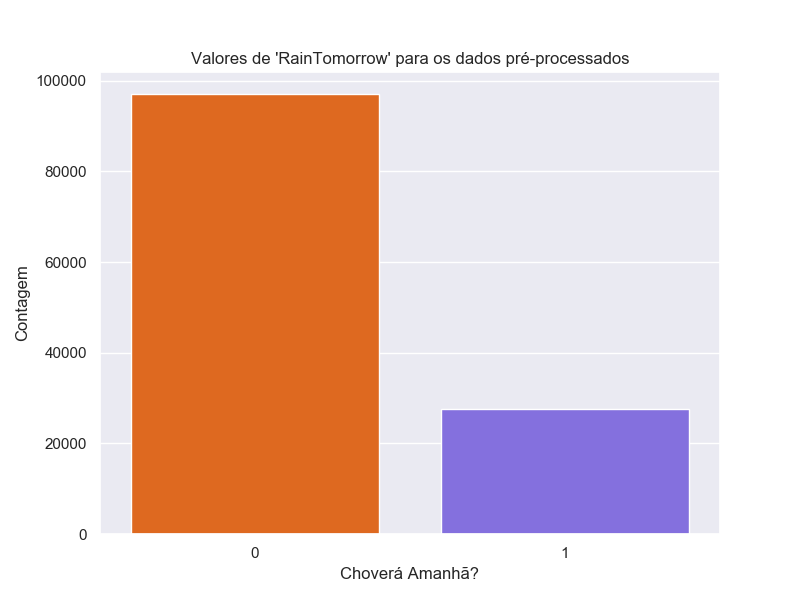



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado.

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [ ]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [ ]:
def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    #Seu código aqui

    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    #Seu código aqui

    return processed_data


def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    #Seu código aqui

    return x_train, x_val, y_train, y_val


In [ ]:
df = load_data()
df = pre_processing(df)
visualize_data(df)
x_train, x_val, y_train, y_val = split_data(df,)

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [ ]:
# Seu código aqui